In [2]:
from windwhisper import windturbines
wind_turbines = [
    {"name": "Turbine 1", "power": 2.5e3, "diameter": 100, "hub height": 80, "position": (47.346060, 8.508267)},
    {"name": "Turbine 2", "power": 3.0e3, "diameter": 105, "hub height": 85, "position": (47.3869, 8.5517)},
    {"name": "Turbine 3", "power": 3.5e3, "diameter": 110, "hub height": 90, "position": (47.3969, 8.5617)},
    {"name": "Turbine 4", "power": 4.0e3, "diameter": 115, "hub height": 95, "position": (47.3869, 8.5317)},
    {"name": "Turbine 5", "power": 4.0e3, "diameter": 120, "hub height": 95, "position": (47.34955801547433, 8.491580864126439)},
    {"name": "Turbine 6", "power": 5.0e3, "diameter": 120, "hub height": 95, "position": (47.34955801547433, 8.491580864126439)}
]

listening_points = [
    {"name": "Listener 1", "position": (47.3769, 8.5517)},
    {"name": "Listener 2", "position": (47.3869, 8.5617)},
    {"name": "Listener 3", "position": (47.3461, 8.5175)},
]


wt = windturbines.WindTurbines(wind_turbines=wind_turbines, listeners=listening_points,)

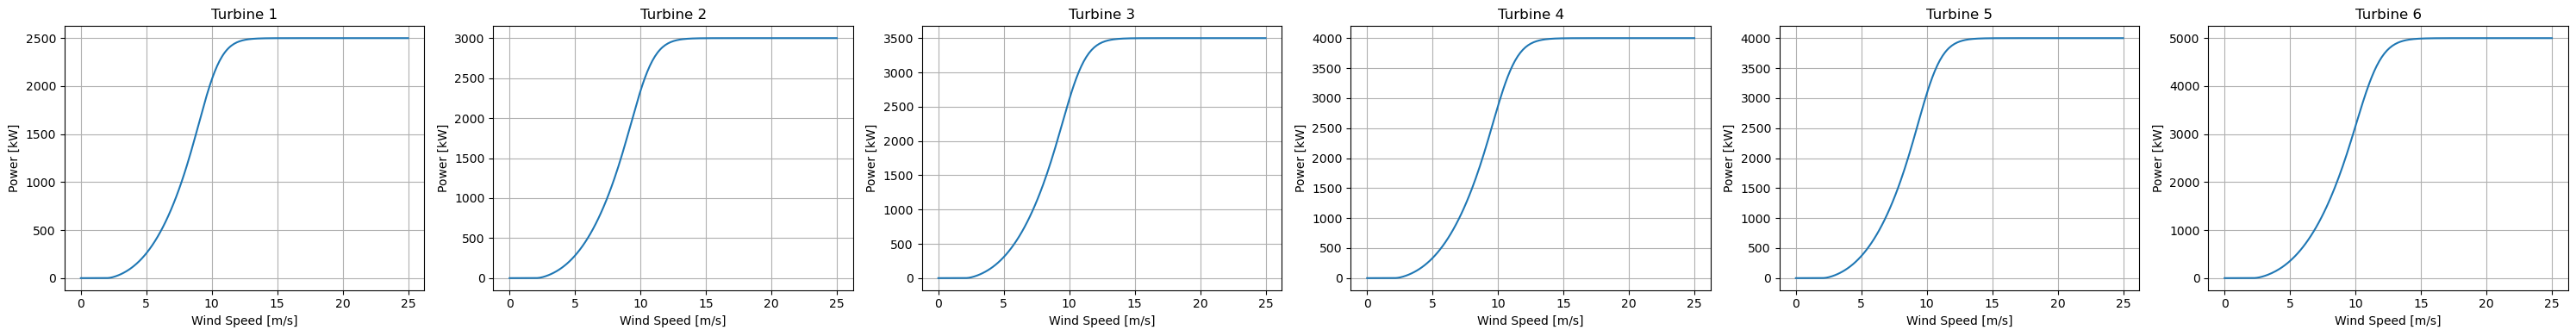

In [3]:
wt.plot_power_curves()

In [4]:
wt.fetch_wind_speeds(debug=False)

Starting concurrent data download for all turbines...
Done.


/Users/maximebalandret/opt/anaconda3/envs/noise/lib/python3.10/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


In [6]:
wt.ws.run_simulation()

NameError: name 'PropagateDownwind' is not defined

In [8]:
wt.fetch_noise_map()

In [9]:
wt.noise_map.plot_noise_map()

interactive(children=(FloatSlider(value=7.0, description='Wind Speed (m/s):', max=12.0, min=3.0, step=1.0), Ou…

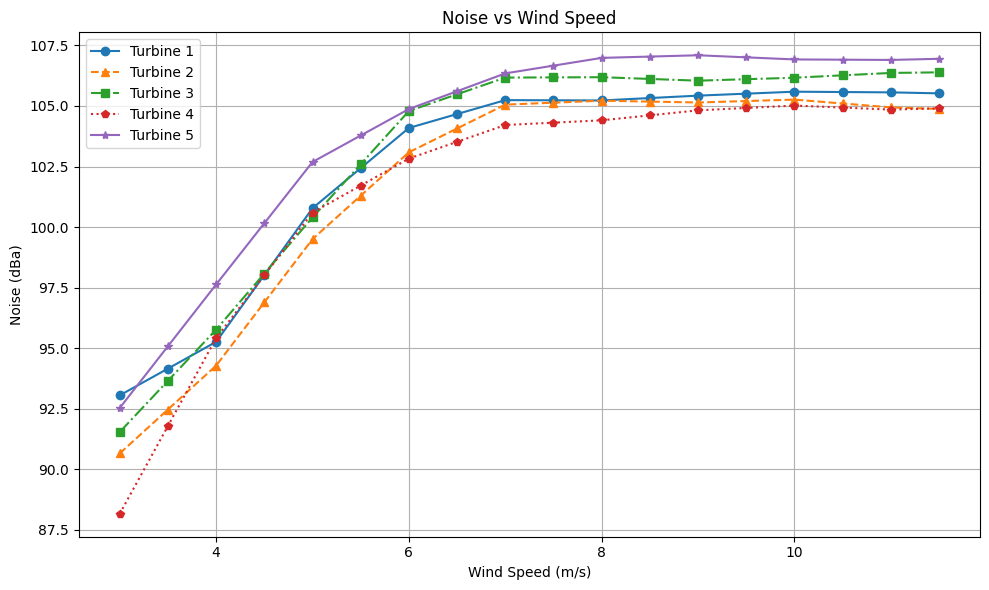

In [8]:
wt.noise

In [5]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.04701274,  95.25751182, 100.77676995, 104.09258867,
        105.24194058, 105.22798734, 105.42737188, 105.59028712,
        105.56246753, 105.48062149],
       [ 90.64894133,  94.27705718,  99.5009827 , 103.08752176,
        105.05589095, 105.2182466 , 105.14455546, 105.26325801,
        104.94217224, 104.81114292],
       [ 91.53342043,  95.76464334, 100.3954427 , 104.79345528,
        106.17289338, 106.18918152, 106.04498142, 106.16726095,
        106.36459259, 106.41410158],
       [ 88.15532518,  95.41237277, 100.59795471, 102.82742421,
        104.21421841, 104.40742185, 104.81934364, 105.0178005 ,
        104.85086077, 104.95646585],
       [ 92.52679739,  97.62731695, 102.68738032, 104.87426586,
        106.34629352, 106.98630498, 107.09505164, 106.92266991,
        106.90167791, 106.99546025]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [6]:
wt.noise_map.plot_noise_map()

interactive(children=(FloatSlider(value=7.0, description='Wind Speed (m/s):', max=12.0, min=3.0, step=1.0), Ou…

In [7]:
wt.noise_map.display_turbines_on_map()

In [6]:
wt.wind_turbines

[{'name': 'Turbine 1',
  'power': 2500.0,
  'diameter': 100.0,
  'hub height': 80.0,
  'position': (47.34606, 8.508267)},
 {'name': 'Turbine 2',
  'power': 3000.0,
  'diameter': 105.0,
  'hub height': 85.0,
  'position': (47.3869, 8.5517)}]

In [7]:
wt.listeners

[{'name': 'Listener 1', 'position': (47.3769, 8.5517)},
 {'name': 'Listener 2', 'position': (47.3869, 8.5617)},
 {'name': 'Listener 3', 'position': (47.346188367055674, 8.507587721502468)}]

In [ ]:
n.whatsmyname()